In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
train = pd.read_csv("../input/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test = pd.read_csv("../input/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# load the data

In [11]:
data_dir = "../input/"

def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + "train.csv")
    print(train.shape)
    
    X_train = train.values[0:train_row, 1:]
    y_train = train.values[0:train_row, 0]
    
    pred_test = pd.read_csv(data_dir + "test.csv").values
    
    return X_train, y_train, pred_test

In [51]:
train_row = 5000
Origin_X_train, Origin_y_train, Origin_X_test = load_data(data_dir, train_row)

(42000, 785)


In [18]:
pd.DataFrame(Origin_X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
pd.DataFrame(Origin_y_train).head()

,0
0,1
1,0
2,1
3,4
4,0


# show the data on the graphs

In [26]:
row = 3
print(Origin_y_train[row])

4


In [30]:
Origin_X_train[row].shape
Origin_X_train[row]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 220, 179,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   9,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  28, 247,  17,   0,   0,   0,   

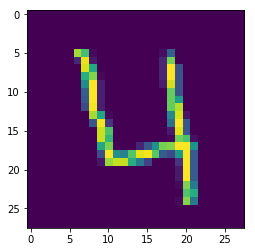

In [28]:
plt.imshow(Origin_X_train[row].reshape((28, 28)))
plt.show()

what it means here? why reshape a row ?
I guess the original data, each row is a 28*28 graph
it was raveled to an one row array

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(Origin_X_train,
                                                   Origin_y_train,
                                                   test_size = 0.2,
                                                   random_state =  0)

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


# start to train test and getting k

In [35]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [36]:
kRange = range(1, 8)


#loop over a k to get different accuracy scores for comparisom in the future

In [46]:
scores = []
for k in kRange:
    startTime = time.time()
    
    # define a model
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    scores.append(accuracy)
    
    endTime = time.time()
    
    print("k = " + str(k))
    print(" time spent is " + str(endTime - startTime) +" secs.")
    print("classification report")
    print(classification_report(y_test, y_pred))
    print("confusion matrix")
    print(confusion_matrix(y_test, y_pred))
    print("\n\n\n\n")

k = 1
 time spent is 5.284869909286499 secs.
classification report
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       103
          1       0.90      0.98      0.94       100
          2       0.97      0.88      0.92       104
          3       0.89      0.93      0.91       100
          4       0.93      0.93      0.93       107
          5       0.95      0.88      0.92        94
          6       0.93      0.97      0.95        93
          7       0.92      0.94      0.93       116
          8       0.89      0.85      0.87        85
          9       0.85      0.85      0.85        98

avg / total       0.92      0.92      0.92      1000

confusion matrix
[[101   0   0   1   0   0   1   0   0   0]
 [  0  98   0   1   0   0   0   0   0   1]
 [  0   1  91   2   2   0   1   2   3   2]
 [  0   0   1  93   0   1   0   1   3   1]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   2   1   3   0  83   3   0   2   0]
 [  1   1   0   0  

In [49]:
print(scores)

[0.919, 0.906, 0.92, 0.915, 0.915, 0.914, 0.915]


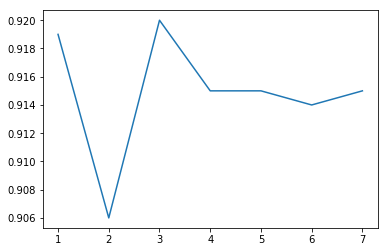

In [50]:
plt.plot(kRange, scores)

# now we know k = 3 is the best model argument

define a new knn model with the best k = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Origin_X_train, Origin_y_train)
y_pred = knn.predict(Origin_X_test)

In [63]:
print("done")
print(y_pred[0:10])

done
[2 0 9 0 3 7 0 3 0 3]


In [56]:
y_pred.shape

(28000,)

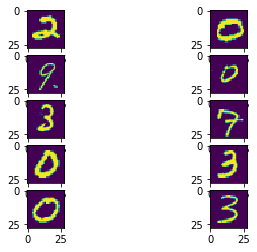

In [62]:
rows = 5
for i in range(10):
    plt.subplot(rows, 2, i + 1)  # ( num of rows, num of columns, index)
    plt.imshow(Origin_X_test[i].reshape((28,28)))
    

# print the result to csv

In [67]:
df = pd.DataFrame({"imageId": list(range(1, len(y_pred) + 1)), "Label": y_pred})
df.head()

,Label,imageId
0,2,1
1,0,2
2,9,3
3,0,4
4,3,5


In [68]:
df.to_csv("result_revisit.csv", index=False,header = True)